In [470]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
#%matplotlib inline
#mpl.style.use( 'ggplot' )
#sns.set_style( 'white' )
#Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8,6 # Big graphs unless specified
sns.set(color_codes=True) # Set style and color of graphs

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [471]:
train = pd.read_csv("/Users/houzhuo/Downloads/train.csv")
test    = pd.read_csv("/Users/houzhuo/Downloads/test.csv")
full = train.append(test,ignore_index=True)
titanic = full[:891]
print ('Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape)
full.info()

('Datasets:', 'full:', (1309, 12), 'titanic:', (891, 12))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [458]:
#plot_correlation_map(titanic)

In [459]:
#plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex')  

In [460]:
#plot_distribution( titanic , var = 'Fare' , target = 'Survived')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,0,0,1,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,0,0,0,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,1,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,0,0,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,0,1,0


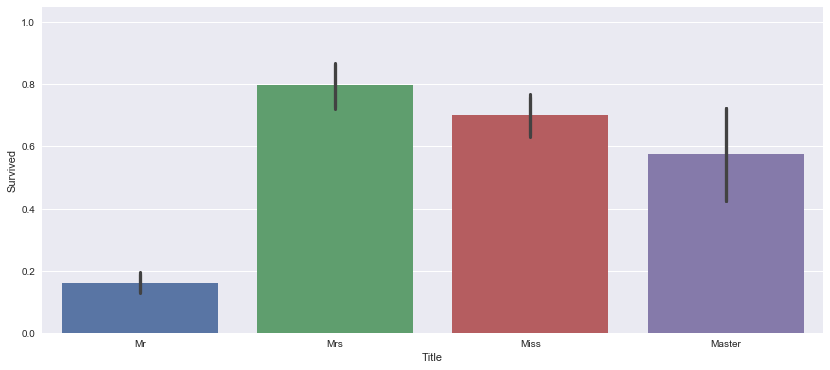

In [472]:
#Title
title = pd.DataFrame()
full['Title'] = full['Name'].map(lambda name:name.split(',')[1].split( '.' )[0].strip())
plt.figure(figsize=(14,6))
sns.barplot('Title', 'Survived', data=full)
#plt.show()
full['Title'] = full['Title'].replace(['Don','Dona', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir','Dr'],'Mr')
full['Title'] = full['Title'].replace(['Mlle','Ms'], 'Miss')
full['Title'] = full['Title'].replace(['the Countess','Mme','Lady','Dr'], 'Mrs')
title = pd.get_dummies(full['Title'],prefix='Title')
full = pd.concat([full,title],axis=1)
sns.barplot('Title', 'Survived', data=full)
full.head()

In [473]:
#Age & isChild
group = full.groupby(['Sex','Title', 'Pclass'])['Age']
full['Age'] = group.transform(lambda x: x.fillna(x.median()))
full = full.drop('Title',axis=1)
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,0,1,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,0,0,0,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,1,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,0,0,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,0,1,0


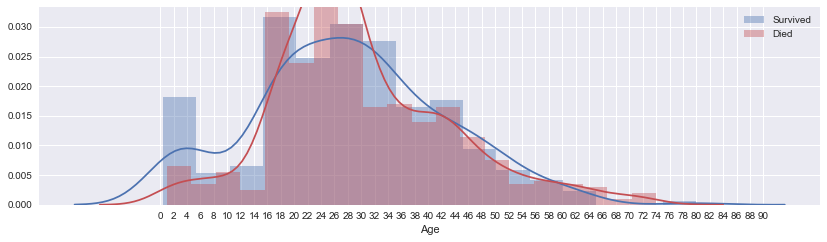

In [454]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.distplot(full['Age'][full.Survived==1],color = 'b')
sns.distplot(full['Age'][full.Survived==0],color = 'r')
plt.legend(['Survived', 'Died']), plt.xticks(range(0,92,2))
plt.show()

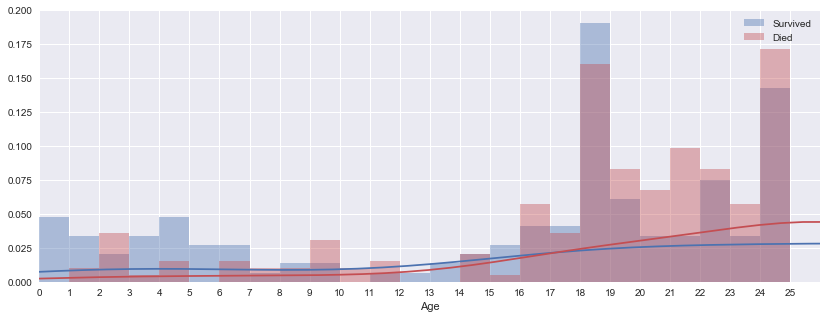

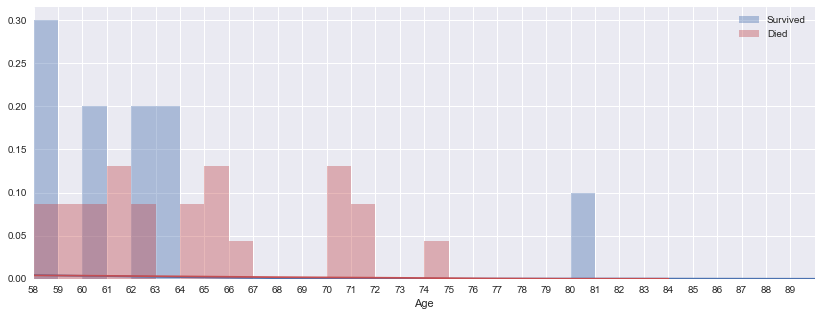

In [176]:
plt.figure(figsize=(14,5))
sns.distplot(full['Age'][full.Survived == 1], range(26), color='b')
sns.distplot(full['Age'][full.Survived == 0], range(26), color='r')
plt.xlim((0,26)), plt.xticks(range(0,26,1))
plt.legend(['Survived', 'Died'])
plt.show()
plt.figure(figsize=(14,5))
sns.distplot(full['Age'][full.Survived == 1], range(58,90), color='b')
sns.distplot(full['Age'][full.Survived == 0], range(58,90), color='r')
plt.xlim((58,90)), plt.xticks(range(58,90,1))
plt.legend(['Survived', 'Died'])
plt.show()

In [474]:
#age = pd.DataFrame()
#full_copy = full
#full_copy[ 'Baby' ] = full_copy[ 'Age' ].map( lambda x : 1 if 0 <= x <=16 else 0 )
#full_copy[ 'Young' ]  = full_copy[ 'Age' ].map( lambda x : 1 if 16 < x <=30 else 0,'yong' )
#full_copy[ 'Adult' ]  = full_copy[ 'Age' ].map( lambda x : 1 if 30 < x <=58 else 0 )
#full_copy[ 'Old' ]  = full_copy[ 'Age' ].map( lambda x : 1 if 58 < x else 0 )
#full_copy = pd.concat([full_copy,age],axis=1)
#full_copy.head()
#sns.barplot('IsOld', 'Survived', data=full_c)
full['IsChild'] = np.where(full['Age']<=12,1,0)
#combine_df['Age'] = pd.cut(combine_df['Age'],5)
#full = full.drop('Age',axis=1)

In [475]:
#Name_length
full['Name_Len'] = full['Name'].apply(lambda x: len(x))
full['Name_Len'] = pd.qcut(full['Name_Len'],5)

#Dead_female_family & Survive_male_family
full['Surname'] = full['Name'].apply(lambda x:x.split(',')[0])
dead_female_surname = list(set(full[(full.Sex=='female') & (full.Age>=12)
                              & (full.Survived==0) & ((full.Parch>0) | (full.SibSp > 0))]['Surname'].values))
survive_male_surname = list(set(full[(full.Sex=='male') & (full.Age>=12)
                              & (full.Survived==1) & ((full.Parch>0) | (full.SibSp > 0))]['Surname'].values))
full['Dead_female_family'] = np.where(full['Surname'].isin(dead_female_surname),0,1)
full['Survive_male_family'] = np.where(full['Surname'].isin(survive_male_surname),0,1)
full = full.drop(['Name','Surname'],axis=1)

,Age,Cabin,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsChild,Name_Len,Dead_female_family,Survive_male_family,FamilySize_Alone,FamilySize_Big,FamilySize_Small
0,22.0,NaN,S,7.2500,1,3,male,0.0,A/5 21171,0,0,1,0,0,"(19.0, 23.2]",1,1,0,0,1
1,38.0,C85,C,71.2833,2,1,female,1.0,PC 17599,0,0,0,1,0,"(32.0, 82.0]",1,1,0,0,1
2,26.0,NaN,S,7.9250,3,3,female,1.0,STON/O2. 3101282,0,1,0,0,0,"(19.0, 23.2]",1,1,1,0,0
3,35.0,C123,S,53.1000,4,1,female,1.0,113803,0,0,0,1,0,"(32.0, 82.0]",1,1,0,0,1
4,35.0,NaN,S,8.0500,5,3,male,0.0,373450,0,0,1,0,0,"(23.2, 27.0]",1,1,1,0,0


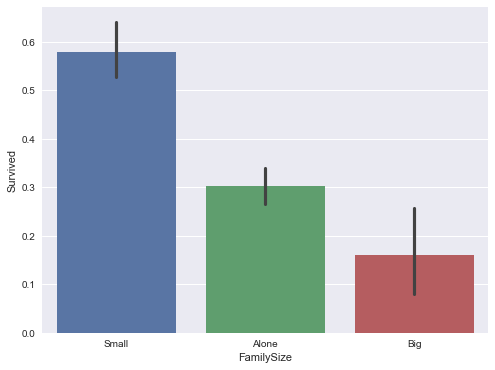

In [476]:
#FamilySize
full['FamilySize'] = np.where(full['SibSp']+full['Parch']==0, 'Alone',
                                    np.where(full['SibSp']+full['Parch']<=3, 'Small', 'Big'))
sns.barplot('FamilySize', 'Survived', data=full)
df = pd.get_dummies(full['FamilySize'],prefix='FamilySize')
full = pd.concat([full,df],axis=1).drop(['SibSp','Parch','FamilySize'],axis=1)
full.head()

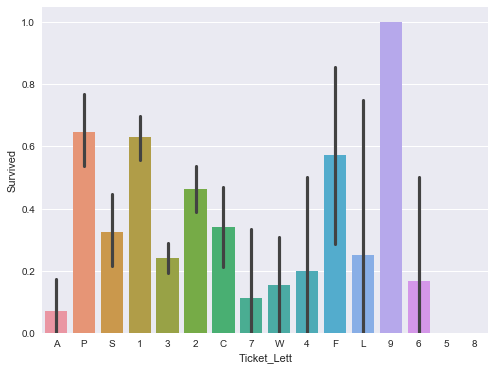

In [477]:
full['Ticket_Lett'] = full['Ticket'].apply(lambda x: str(x)[0])
full['Ticket_Lett'] = full['Ticket_Lett'].apply(lambda x: str(x))
sns.barplot('Ticket_Lett', 'Survived', data=full)
full['High_Survival_Ticket'] = np.where(full['Ticket_Lett'].isin(['1', '2', 'P']),1,0)
full['Low_Survival_Ticket'] = np.where(full['Ticket_Lett'].isin(['A','W','3','7']),1,0)
full = full.drop(['Ticket','Ticket_Lett'],axis=1)

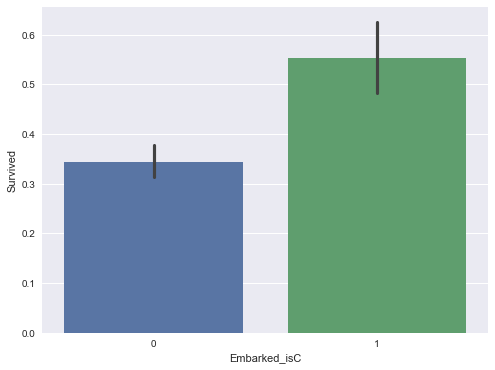

In [478]:
#Embarked
#full = full.drop('Embarked',axis=1)
#sns.barplot('Embarked','Survived',data=full)
full['Embarked_isC'] = np.where(full['Embarked']=='C',1,0)
sns.barplot('Embarked_isC','Survived',data=full)

In [479]:
#Cabin
full[ 'Cabin' ] = full.Cabin.fillna( 'U' )
#full["Cabin"] = full["Cabin"].map(lambda x: x[0])
#full.Cabin
#plt.subplot(211)
#sns.barplot('Cabin','Survived',data=full)
#full['Cabin_isNull'] = np.where(full['Cabin'].isnull(),0,1)

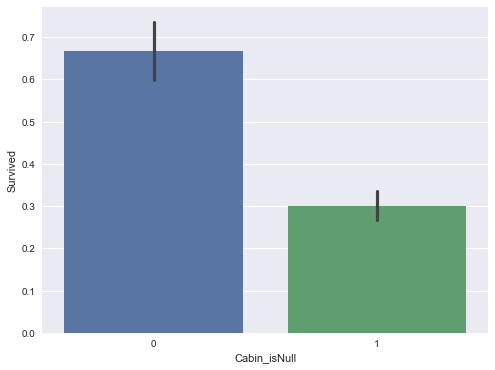

In [480]:
full['Cabin_isNull'] = np.where(full['Cabin']=='U',1,0)
sns.barplot('Cabin_isNull','Survived',data=full)
full = full.drop('Cabin',axis=1)

In [481]:
#PClass
df = pd.get_dummies(full['Pclass'],prefix='Pclass')
full = pd.concat([full,df],axis=1).drop('Pclass',axis=1)

In [482]:
#Sex
full['Sex'] = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
#df = pd.get_dummies(full['Sex'],prefix='Sex')
#full = pd.concat([full,df],axis=1).drop('Sex',axis=1)

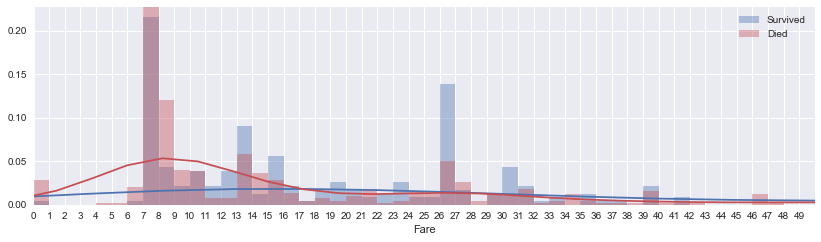

In [438]:
#Fare
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.distplot(full['Fare'][full.Survived==1],range(50),color = 'b')
sns.distplot(full['Fare'][full.Survived==0],range(50),color = 'r')
plt.legend(['Survived', 'Died']), plt.xlim((0,50)),plt.xticks(range(0,50,1))
plt.show()


In [483]:
full['Fare'].fillna(full['Fare'].dropna().median(),inplace=True)
full['Low_Fare'] = np.where(full['Fare']<=8.66,1,0)
full['High_Fare'] = np.where(full['Fare']>=26,1,0)
full = full.drop('Fare',axis=1)

In [484]:
full.head()

,Age,Embarked,PassengerId,Sex,Survived,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsChild,...,FamilySize_Small,High_Survival_Ticket,Low_Survival_Ticket,Embarked_isC,Cabin_isNull,Pclass_1,Pclass_2,Pclass_3,Low_Fare,High_Fare
0,22.0,S,1,1,0.0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
1,38.0,C,2,0,1.0,0,0,0,1,0,...,1,1,0,1,0,1,0,0,0,1
2,26.0,S,3,0,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,35.0,S,4,0,1.0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1
4,35.0,S,5,1,0.0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0


In [490]:
full_X = full
full_X = full_X.drop('PassengerId',axis=1)
full_X = full_X.drop('Survived',axis=1)
full_X = full_X.drop('Embarked',axis=1)
full_X = full_X.drop('Age',axis=1)
full_X = full_X.drop('Name_Len',axis=1)

full_X.head()

,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsChild,Dead_female_family,Survive_male_family,FamilySize_Alone,FamilySize_Big,FamilySize_Small,High_Survival_Ticket,Low_Survival_Ticket,Embarked_isC,Cabin_isNull,Pclass_1,Pclass_2,Pclass_3,Low_Fare,High_Fare
0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0
1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
2,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Title_Master            1309 non-null uint8
Title_Miss              1309 non-null uint8
Title_Mr                1309 non-null uint8
Title_Mrs               1309 non-null uint8
IsChild                 1309 non-null int64
FamilySize_Alone        1309 non-null uint8
FamilySize_Big          1309 non-null uint8
FamilySize_Small        1309 non-null uint8
High_Survival_Ticket    1309 non-null int64
Low_Survival_Ticket     1309 non-null int64
Cabin_isNull            1309 non-null int64
Pclass_1                1309 non-null uint8
Pclass_2                1309 non-null uint8
Pclass_3                1309 non-null uint8
Sex_female              1309 non-null uint8
Sex_male                1309 non-null uint8
Low_Fare                1309 non-null int64
High_Fare               1309 non-null int64
dtypes: int64(6), uint8(12)
memory usage: 76.8 KB


In [491]:
X_train= full_X[ 0:891 ]
y_train = titanic.Survived
X_test = full_X[ 891: ]
print (full_X.shape , X_train.shape , X_test.shape , y_train.shape )
X_train.head()

((1309, 20), (891, 20), (418, 20), (891,))


,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,IsChild,Dead_female_family,Survive_male_family,FamilySize_Alone,FamilySize_Big,FamilySize_Small,High_Survival_Ticket,Low_Survival_Ticket,Embarked_isC,Cabin_isNull,Pclass_1,Pclass_2,Pclass_3,Low_Fare,High_Fare
0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0
1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
2,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,1,1,0


In [385]:
from sklearn.cross_validation import cross_val_score
def compute_score(model, X, y, scoring='accuracy'):
    xval = cross_val_score(model, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [493]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [2, 3, 10],
                 'bootstrap': [True, False],
                 }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(y_train, n_folds=5)
#print 'serching..'

grid_search = GridSearchCV(forest,
                           scoring='accuracy',
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, y_train)
model = grid_search
parameters = grid_search.best_params_

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
model = RandomForestClassifier(**parameters)
model.fit(X_train, y_train)
compute_score(model,X_train, y_train, scoring='accuracy')

Best score: 0.884399551066
Best parameters: {'bootstrap': False, 'min_samples_leaf': 2, 'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 6}


0.87209079976608161

In [492]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
model = RandomForestClassifier(**parameters)
model = model.fit(X_train, y_train)
compute_score(model,X_train, y_train, scoring='accuracy')

0.87879471038060686

In [422]:
compute_score(model,X_train, y_train, scoring='accuracy')

0.81707150220920932

In [297]:
full_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
Survived                891 non-null float64
Title_Master            1309 non-null uint8
Title_Miss              1309 non-null uint8
Title_Mr                1309 non-null uint8
Title_Mrs               1309 non-null uint8
IsChild                 1309 non-null int64
FamilySize_Alone        1309 non-null uint8
FamilySize_Big          1309 non-null uint8
FamilySize_Small        1309 non-null uint8
High_Survival_Ticket    1309 non-null int64
Low_Survival_Ticket     1309 non-null int64
Cabin_isNull            1309 non-null int64
Pclass_1                1309 non-null uint8
Pclass_2                1309 non-null uint8
Pclass_3                1309 non-null uint8
Sex_female              1309 non-null uint8
Sex_male                1309 non-null uint8
Low_Fare                1309 non-null int64
High_Fare               1309 non-null int64
dtypes: float64(1), int64(6), uint8(12)
memory usage: 87

In [494]:
y_test = model.predict( X_test )

passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': y_test.astype(np.int64) } )
#test.shape
#test.head()
test.to_csv( 'titanic_pred.csv' , index = False )